<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/3-More_Markov_Chains/More_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#More Markov Chains

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-absorbing.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

## Summary

### Part 1

You roll a fair six-sided die 6 times. Whatever the results, you paint those on the sides of a blank die. So, if your rolls were 4, 5, 2, 6, 1, 1, then your new die has no 3’s and two 1’s. Then, you repeat the process with your new die — roll it 6 times and paint the results on a blank die. Eventually, you’ll roll the same number 6 times, at which point the process stops. Let $T$ = the number of rounds (of 6 rolls each) that you perform until stopping. (If your 6 rolls in the first round all result in the same number, then you stop with $T=1$.)

### Part 2

In this part you will create and solve your own problems involving Markov chains. You have lots of flexibility, but your problems should include at least one part that requires:
- A simulation
- An analytical solution that uses either first step analysis/absorption
- An analtyical solution that uses stationary distributions/long run behavior

---

## Application - Part 1

###1.

Code and run a simulation to approximate the distribution of $T$ and its expected value, without using Markov chains. Summarize the approximate distribution in an appropriate plot, and describe the distribution in 2-3 sentences (e.g., compute and interpret a few percentiles).

In [1]:
import numpy as np

def die_sim():
  # create containers for dice
  fresh_die = [1, 2, 3, 4, 5, 6]
  current_die = fresh_die
  new_die = fresh_die

  #create flag for loop and variables
  same = False
  rolls = 6 # rolls corisponding to sides of dice
  T = 0 # number of dice created before all sides are the same

  while(not same):
    #show current die
    #print(current_die, "\n")

    # roll current die and create new die
    # for i in range(0,rolls):
    #   result = np.random.choice(current_die)
    #   new_die[i] = result

    new_die = [np.random.choice(current_die) for i in range(rolls)]

    #increment die counter, check die side similarity
    T += 1
    current_die = new_die
    same = all(x == new_die[0] for x in new_die)

  #print(current_die, "\n", T)
  return T

In [2]:
# run simulation multiple times
sims = 10000

sim_results = np.empty(sims)

for i in range(0,sims):
  sim_results[i] = die_sim()

(array([8.44615385e-02, 6.20769231e-02, 2.71538462e-02, 1.07884615e-02,
        4.61538462e-03, 2.38461538e-03, 4.80769231e-04, 1.73076923e-04,
        1.34615385e-04, 3.84615385e-05]),
 array([ 2. ,  7.2, 12.4, 17.6, 22.8, 28. , 33.2, 38.4, 43.6, 48.8, 54. ]),
 <BarContainer object of 10 artists>)

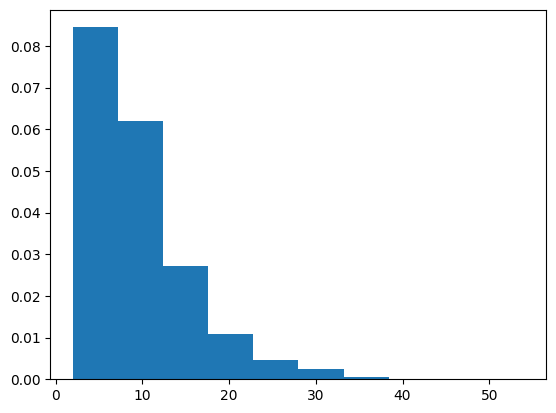

In [3]:
import matplotlib.pyplot as plt

plt.hist(sim_results, density = True)

In [4]:
# compute expected value
ev = sim_results.mean()
std_dev = sim_results.std()
print("The average of dice created until the final with all the same sides is {:.2f} dice".format(ev))
print("The standard deviation was {:.2f} dice".format(std_dev))

The average of dice created until the final with all the same sides is 9.72 dice
The standard deviation was 5.86 dice


The distribution seems to be right skewed, with the bulk of the required rolls hovering around 5-10. The expected value of the distribution is about 9.72 rolls.

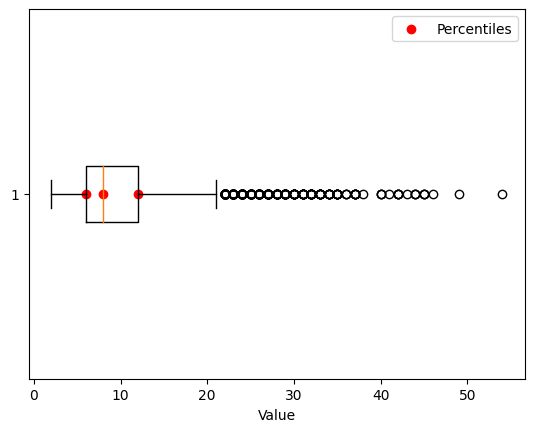

In [7]:
# calculate percentiles
percentiles = np.percentile(sim_results, [25, 50, 75])

# create a box plot with percentiles
plt.boxplot(sim_results, vert=False)
plt.scatter(percentiles, [1, 1, 1], color='red', marker='o', label='Percentiles')
plt.xlabel('Value')
plt.legend()
plt.show()

In [6]:
print("The percentiles are :",percentiles)

The percentiles are : [ 6.  8. 12.]


###2.

Define a Markov chain that will help you find $E(T)$. Be sure to clearly define the state space. (Note: there are several ways to do this; any one is fine just be clear in your choice.)

###3.

Determine the transition matrix for your Markov chain. You might want to compute a few of the transition probabilities by hand, but you’ll probably need to write code to fill in the whole matrix.

###4.

Use the transition matrix and tools from class to solve for $E(T)$. Compare to the simulated value from part 1.

###5.

Use the transition matrix and tools from class to solve for the distribution of $T$, and display the distribution in an appropriate plot. Compare to the simulated distribution from part 1.

---

## Application - Part 2